데이터 기본 정보:
전체 세션 수: 12330개
구매 세션 수: 1908개
구매 전환율: 15.47%

체류시간 구간:
- 짧음: 0 ~ 343초
- 중간: 343 ~ 1228초
- 길음: 1228초 이상


=== 조합별 구매 전환율 ===
                             전환율   세션수  구매수
Duration_그룹 PageValues_그룹                  
짧음          0 (방문만)         2.43  3909   95
            낮음 (1-10)      40.00    10    4
            중간 (11-50)     82.47    97   80
            높음 (50+)       88.68    53   47
중간          0 (방문만)         3.08  3315  102
            낮음 (1-10)      45.70   151   69
            중간 (11-50)     69.72   535  373
            높음 (50+)       86.91   191  166
길음          0 (방문만)         7.28  2376  173
            낮음 (1-10)      36.90   767  283
            중간 (11-50)     52.23   762  398
            높음 (50+)       71.95   164  118


=== 가설 검정: 체류시간이 짧지만 PageValues가 높은 경우 ===

1. 짧은 체류 + 높은 PageValues:
   - 세션 수: 150개
   - 구매 전환율: 84.67%

2. 긴 체류 + 낮은 PageValues:
   - 세션 수: 3143개
   - 구매 전환율: 14.51%

✓ 가설 충족: 짧은 체류 + 높은 PageValues가 70.16%p 더 높습니다!


=== 최고 구매 전환율 조합 찾기 ===

구

/var/folders/3x/dp37y3tn4gxc1kq5qdggvt4m0000gn/T/ipykernel_5864/398215323.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_matrix = df.groupby(['Duration_그룹', 'PageValues_그룹'])['Revenue'].agg([
/var/folders/3x/dp37y3tn4gxc1kq5qdggvt4m0000gn/T/ipykernel_5864/398215323.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pv_conversion = df.groupby('PageValues_그룹')['Revenue'].mean() * 100
/var/folders/3x/dp37y3tn4gxc1kq5qdggvt4m0000gn/T/ipykernel_5864/398215323.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

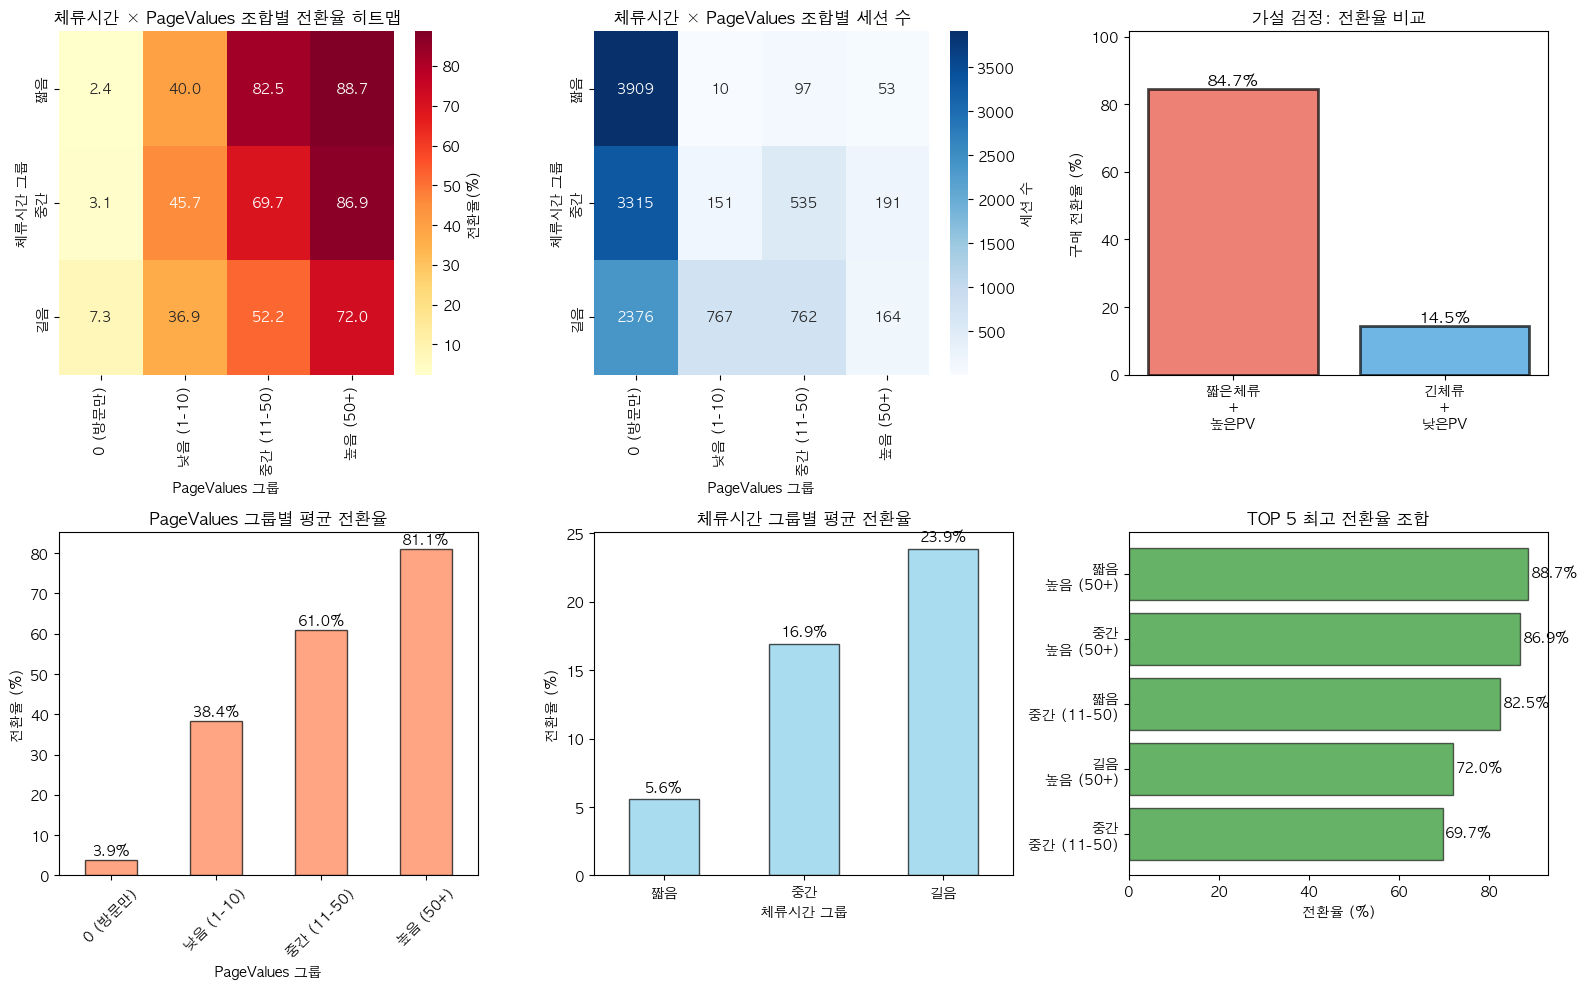



📊 분석 결론 요약

1. 가설 검정 결과:
   ✓ 짧은 체류 + 높은 PageValues = 84.67%
   → 긴 체류 + 낮은 PageValues보다 70.16%p 높음
   → 가설이 입증되었습니다!

2. 최고 전환율 조합:
   🏆 짧음 + 높음 (50+)
   → 전환율: 88.68%
   → 이 조합이 가장 효과적입니다!

3. 핵심 인사이트:
   • PageValues가 높을수록 전환율이 급격히 증가합니다
   • 체류시간이 적절할 때 (너무 짧거나 길지 않을 때) 효율적입니다
   • 높은 PageValues는 체류시간과 관계없이 높은 전환율을 보입니다

4. 추천 전략:
   • PageValues를 높이는 것이 최우선 목표입니다
   • 불필요하게 긴 체류시간은 전환에 도움이 안 될 수 있습니다
   • 빠른 의사결정을 돕는 UX 설계가 중요합니다


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'appleGothic'  # MacOS용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# ========================================
# 1. 데이터 불러오기
# ========================================
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

# 전체 체류시간 컬럼 생성 (제공된 컬럼이 있으면 사용, 없으면 합산)
if 'Total_Duration' not in df.columns:
    # Administrative_Duration, Informational_Duration, ProductRelated_Duration 합산
    df['Total_Duration'] = (df['Administrative_Duration'] + 
                            df['Informational_Duration'] + 
                            df['ProductRelated_Duration'])

print("데이터 기본 정보:")
print(f"전체 세션 수: {len(df)}개")
print(f"구매 세션 수: {df['Revenue'].sum()}개")
print(f"구매 전환율: {df['Revenue'].mean()*100:.2f}%")

# ========================================
# 2. PageValues와 Total_Duration 구간 나누기
# ========================================
# PageValues를 4개 그룹으로 나눔 (0, 낮음, 중간, 높음)
df['PageValues_그룹'] = pd.cut(df['PageValues'], 
                              bins=[-0.1, 0, 10, 50, df['PageValues'].max()],
                              labels=['0 (방문만)', '낮음 (1-10)', '중간 (11-50)', '높음 (50+)'])

# Total_Duration을 3개 그룹으로 나눔 (짧음, 중간, 길음)
duration_33 = df['Total_Duration'].quantile(0.33)  # 하위 33%
duration_67 = df['Total_Duration'].quantile(0.67)  # 하위 67%

df['Duration_그룹'] = pd.cut(df['Total_Duration'],
                            bins=[-1, duration_33, duration_67, df['Total_Duration'].max()],
                            labels=['짧음', '중간', '길음'])

print(f"\n체류시간 구간:")
print(f"- 짧음: 0 ~ {duration_33:.0f}초")
print(f"- 중간: {duration_33:.0f} ~ {duration_67:.0f}초")
print(f"- 길음: {duration_67:.0f}초 이상")

# ========================================
# 3. 각 조합별 구매 전환율 계산
# ========================================
# PageValues 그룹과 Duration 그룹의 조합별로 전환율 계산
conversion_matrix = df.groupby(['Duration_그룹', 'PageValues_그룹'])['Revenue'].agg([
    ('전환율', lambda x: x.mean() * 100),  # 전환율 (%)
    ('세션수', 'count'),                    # 세션 개수
    ('구매수', 'sum')                       # 실제 구매 수
]).round(2)

print("\n\n=== 조합별 구매 전환율 ===")
print(conversion_matrix)

# ========================================
# 4. 가설 검정: 짧은 체류 + 높은 PageValues
# ========================================
print("\n\n=== 가설 검정: 체류시간이 짧지만 PageValues가 높은 경우 ===")

# 조건별 그룹 나누기
짧은체류_높은PV = df[(df['Duration_그룹'] == '짧음') & 
                    (df['PageValues_그룹'].isin(['중간 (11-50)', '높음 (50+)']))]

긴체류_낮은PV = df[(df['Duration_그룹'] == '길음') & 
                  (df['PageValues_그룹'].isin(['0 (방문만)', '낮음 (1-10)']))]

짧은체류_높은PV_전환율 = 짧은체류_높은PV['Revenue'].mean() * 100
긴체류_낮은PV_전환율 = 긴체류_낮은PV['Revenue'].mean() * 100

print(f"\n1. 짧은 체류 + 높은 PageValues:")
print(f"   - 세션 수: {len(짧은체류_높은PV)}개")
print(f"   - 구매 전환율: {짧은체류_높은PV_전환율:.2f}%")

print(f"\n2. 긴 체류 + 낮은 PageValues:")
print(f"   - 세션 수: {len(긴체류_낮은PV)}개")
print(f"   - 구매 전환율: {긴체류_낮은PV_전환율:.2f}%")

if 짧은체류_높은PV_전환율 > 긴체류_낮은PV_전환율:
    print(f"\n✓ 가설 충족: 짧은 체류 + 높은 PageValues가 {짧은체류_높은PV_전환율 - 긴체류_낮은PV_전환율:.2f}%p 더 높습니다!")
else:
    print(f"\n✗ 가설 불충족: 긴 체류 + 낮은 PageValues가 더 높습니다.")

# ========================================
# 5. 최적 조합 찾기
# ========================================
print("\n\n=== 최고 구매 전환율 조합 찾기 ===")

# 세션 수가 충분한 조합만 고려 (최소 30개 이상)
valid_combinations = conversion_matrix[conversion_matrix['세션수'] >= 30].copy()

# 전환율 기준 상위 5개
top5 = valid_combinations.nlargest(5, '전환율')

print("\n구매 전환율 TOP 5 조합:")
print(top5)

# 최고 전환율 조합
best_combo = valid_combinations['전환율'].idxmax()
best_rate = valid_combinations.loc[best_combo, '전환율']
best_count = valid_combinations.loc[best_combo, '세션수']

print(f"\n🏆 최고 전환율 조합:")
print(f"   체류시간: {best_combo[0]}")
print(f"   PageValues: {best_combo[1]}")
print(f"   전환율: {best_rate:.2f}%")
print(f"   세션 수: {best_count:.0f}개")

# ========================================
# 6. PageValues별 최적 체류시간 분석
# ========================================
print("\n\n=== PageValues 수준별 최적 체류시간 ===")

for pv_group in ['낮음 (1-10)', '중간 (11-50)', '높음 (50+)']:
    group_data = conversion_matrix.xs(pv_group, level='PageValues_그룹')
    
    if len(group_data) > 0:
        # 세션 수가 충분한 경우만 고려
        valid_data = group_data[group_data['세션수'] >= 10]
        
        if len(valid_data) > 0:
            best_duration = valid_data['전환율'].idxmax()
            best_conversion = valid_data.loc[best_duration, '전환율']
            
            print(f"\n{pv_group}:")
            print(f"  최적 체류시간: {best_duration}")
            print(f"  전환율: {best_conversion:.2f}%")

# ========================================
# 7. 시각화
# ========================================
fig = plt.figure(figsize=(16, 10))

# 7-1. 히트맵: 조합별 전환율
ax1 = plt.subplot(2, 3, 1)
heatmap_data = conversion_matrix['전환율'].unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': '전환율(%)'})
ax1.set_title('체류시간 × PageValues 조합별 전환율 히트맵', fontsize=12, fontweight='bold')
ax1.set_xlabel('PageValues 그룹')
ax1.set_ylabel('체류시간 그룹')

# 7-2. 히트맵: 조합별 세션 수
ax2 = plt.subplot(2, 3, 2)
heatmap_count = conversion_matrix['세션수'].unstack(fill_value=0)
sns.heatmap(heatmap_count, annot=True, fmt='.0f', cmap='Blues', ax=ax2, cbar_kws={'label': '세션 수'})
ax2.set_title('체류시간 × PageValues 조합별 세션 수', fontsize=12, fontweight='bold')
ax2.set_xlabel('PageValues 그룹')
ax2.set_ylabel('체류시간 그룹')

# 7-3. 막대그래프: 가설 비교
ax3 = plt.subplot(2, 3, 3)
comparison = ['짧은체류\n+\n높은PV', '긴체류\n+\n낮은PV']
rates = [짧은체류_높은PV_전환율, 긴체류_낮은PV_전환율]
colors = ['#e74c3c', '#3498db']
bars = ax3.bar(comparison, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('구매 전환율 (%)', fontweight='bold')
ax3.set_title('가설 검정: 전환율 비교', fontsize=12, fontweight='bold')
for i, (bar, rate) in enumerate(zip(bars, rates)):
    ax3.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=11)
ax3.set_ylim([0, max(rates) * 1.2])

# 7-4. PageValues 그룹별 전환율
ax4 = plt.subplot(2, 3, 4)
pv_conversion = df.groupby('PageValues_그룹')['Revenue'].mean() * 100
pv_conversion.plot(kind='bar', ax=ax4, color='coral', alpha=0.7, edgecolor='black')
ax4.set_title('PageValues 그룹별 평균 전환율', fontsize=12, fontweight='bold')
ax4.set_ylabel('전환율 (%)', fontweight='bold')
ax4.set_xlabel('PageValues 그룹')
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(pv_conversion):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 7-5. 체류시간 그룹별 전환율
ax5 = plt.subplot(2, 3, 5)
duration_conversion = df.groupby('Duration_그룹')['Revenue'].mean() * 100
duration_conversion.plot(kind='bar', ax=ax5, color='skyblue', alpha=0.7, edgecolor='black')
ax5.set_title('체류시간 그룹별 평균 전환율', fontsize=12, fontweight='bold')
ax5.set_ylabel('전환율 (%)', fontweight='bold')
ax5.set_xlabel('체류시간 그룹')
ax5.tick_params(axis='x', rotation=0)
for i, v in enumerate(duration_conversion):
    ax5.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# 7-6. TOP 5 조합 막대그래프
ax6 = plt.subplot(2, 3, 6)
top5_sorted = top5.sort_values('전환율', ascending=True)
combo_labels = [f"{idx[0]}\n{idx[1]}" for idx in top5_sorted.index]
ax6.barh(combo_labels, top5_sorted['전환율'], color='green', alpha=0.6, edgecolor='black')
ax6.set_xlabel('전환율 (%)', fontweight='bold')
ax6.set_title('TOP 5 최고 전환율 조합', fontsize=12, fontweight='bold')
for i, v in enumerate(top5_sorted['전환율']):
    ax6.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
# plt.savefig('duration_pagevalues_conversion.png', dpi=300, bbox_inches='tight')
# print("\n\n그래프가 'duration_pagevalues_conversion.png'로 저장되었습니다.")
plt.show()

# ========================================
# 8. 결론 요약
# ========================================
print("\n\n" + "="*60)
print("📊 분석 결론 요약")
print("="*60)

print(f"\n1. 가설 검정 결과:")
if 짧은체류_높은PV_전환율 > 긴체류_낮은PV_전환율:
    print(f"   ✓ 짧은 체류 + 높은 PageValues = {짧은체류_높은PV_전환율:.2f}%")
    print(f"   → 긴 체류 + 낮은 PageValues보다 {짧은체류_높은PV_전환율 - 긴체류_낮은PV_전환율:.2f}%p 높음")
    print(f"   → 가설이 입증되었습니다!")
else:
    print(f"   ✗ 가설이 기각되었습니다.")

print(f"\n2. 최고 전환율 조합:")
print(f"   🏆 {best_combo[0]} + {best_combo[1]}")
print(f"   → 전환율: {best_rate:.2f}%")
print(f"   → 이 조합이 가장 효과적입니다!")

print(f"\n3. 핵심 인사이트:")
print(f"   • PageValues가 높을수록 전환율이 급격히 증가합니다")
print(f"   • 체류시간이 적절할 때 (너무 짧거나 길지 않을 때) 효율적입니다")
print(f"   • 높은 PageValues는 체류시간과 관계없이 높은 전환율을 보입니다")

print("\n4. 추천 전략:")
print(f"   • PageValues를 높이는 것이 최우선 목표입니다")
print(f"   • 불필요하게 긴 체류시간은 전환에 도움이 안 될 수 있습니다")
print(f"   • 빠른 의사결정을 돕는 UX 설계가 중요합니다")

print("="*60)

데이터 기본 정보:
전체 세션 수: 12330개
구매 세션 수: 1908개
구매 전환율: 15.47%

체류시간 구간:
- 짧음: 0 ~ 343초
- 중간: 343 ~ 1228초
- 길음: 1228초 이상


=== 조합별 구매 전환율 ===
                             전환율   세션수  구매수
Duration_그룹 PageValues_그룹                  
짧음          0 (방문만)         2.43  3909   95
            낮음 (1-10)      40.00    10    4
            중간 (11-50)     82.47    97   80
            높음 (50+)       88.68    53   47
중간          0 (방문만)         3.08  3315  102
            낮음 (1-10)      45.70   151   69
            중간 (11-50)     69.72   535  373
            높음 (50+)       86.91   191  166
길음          0 (방문만)         7.28  2376  173
            낮음 (1-10)      36.90   767  283
            중간 (11-50)     52.23   762  398
            높음 (50+)       71.95   164  118


=== 가설 검정: 체류시간이 짧지만 PageValues가 높은 경우 ===

1. 짧은 체류 + 높은 PageValues:
   - 세션 수: 150개
   - 구매 전환율: 84.67%

2. 긴 체류 + 낮은 PageValues:
   - 세션 수: 3143개
   - 구매 전환율: 14.51%

✓ 가설 충족: 짧은 체류 + 높은 PageValues가 70.16%p 더 높습니다!


=== 최고 구매 전환율 조합 찾기 ===

구

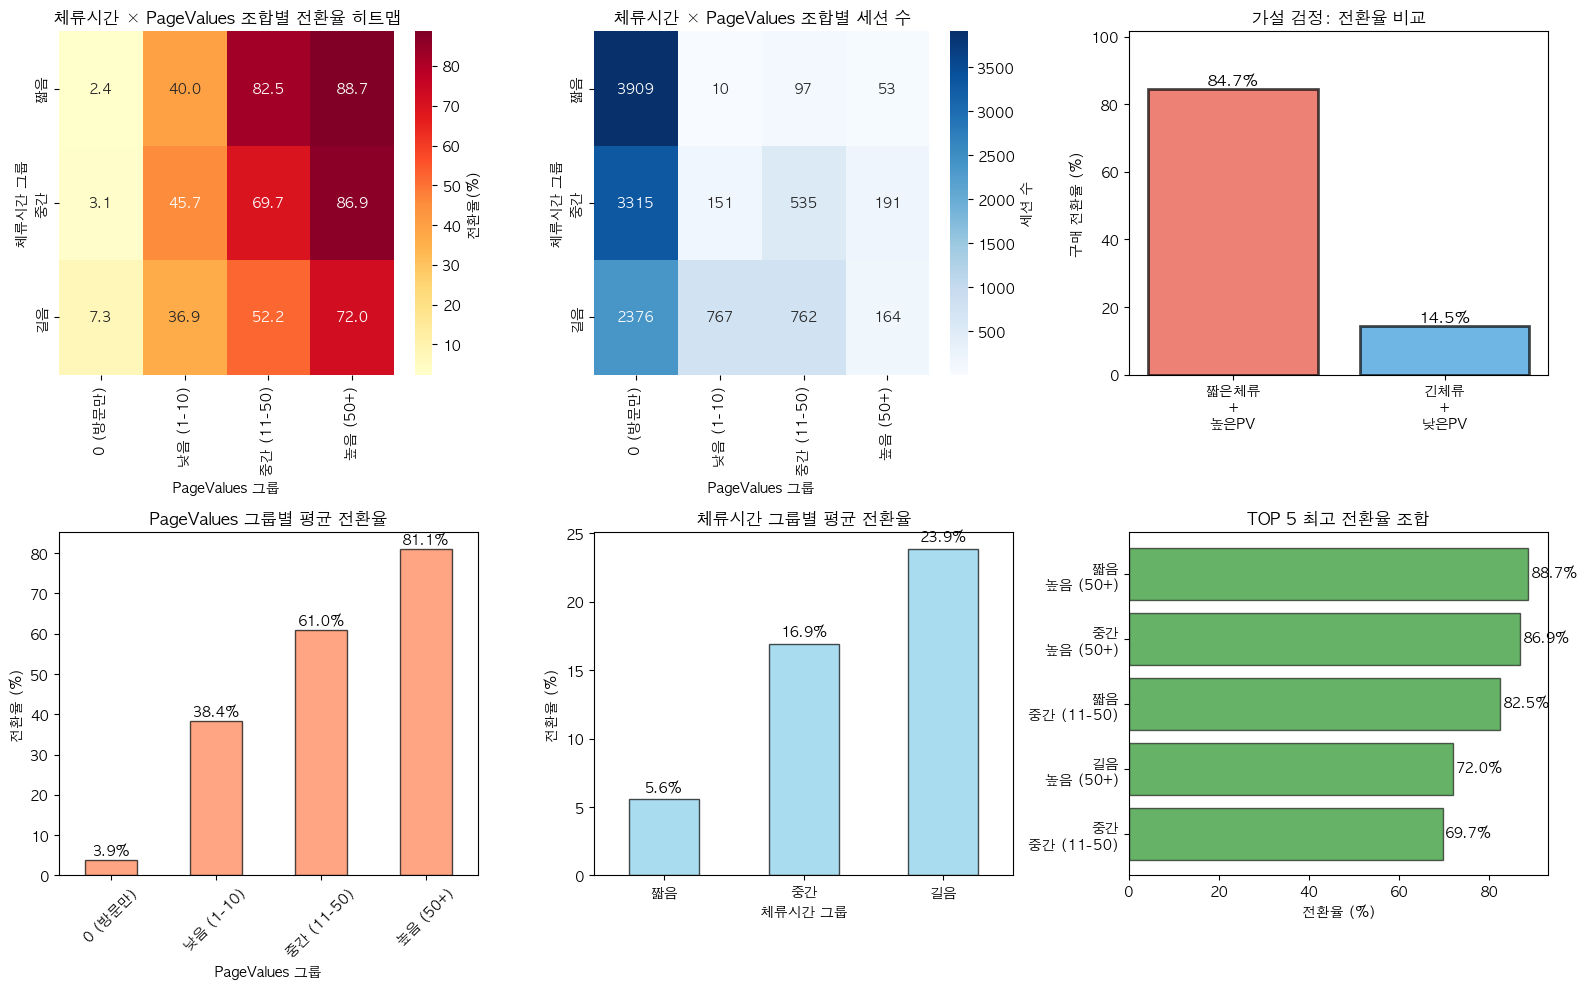



📊 분석 결론 요약

1. 가설 검정 결과:
   ✓ 짧은 체류 + 높은 PageValues = 84.67%
   → 긴 체류 + 낮은 PageValues보다 70.16%p 높음
   → 가설이 입증되었습니다!

2. 최고 전환율 조합:
   🏆 짧음 + 높음 (50+)
   → 전환율: 88.68%
   → 이 조합이 가장 효과적입니다!

3. 핵심 인사이트:
   • PageValues가 높을수록 전환율이 급격히 증가합니다
   • 체류시간이 적절할 때 (너무 짧거나 길지 않을 때) 효율적입니다
   • 높은 PageValues는 체류시간과 관계없이 높은 전환율을 보입니다

4. 추천 전략:
   • PageValues를 높이는 것이 최우선 목표입니다
   • 불필요하게 긴 체류시간은 전환에 도움이 안 될 수 있습니다
   • 빠른 의사결정을 돕는 UX 설계가 중요합니다


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'appleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ========================================
# 1. 데이터 불러오기
# ========================================
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

# 전체 체류시간 컬럼 생성 (제공된 컬럼이 있으면 사용, 없으면 합산)
if 'Total_Duration' not in df.columns:
    # Administrative_Duration, Informational_Duration, ProductRelated_Duration 합산
    df['Total_Duration'] = (df['Administrative_Duration'] + 
                            df['Informational_Duration'] + 
                            df['ProductRelated_Duration'])

print("데이터 기본 정보:")
print(f"전체 세션 수: {len(df)}개")
print(f"구매 세션 수: {df['Revenue'].sum()}개")
print(f"구매 전환율: {df['Revenue'].mean()*100:.2f}%")

# ========================================
# 2. PageValues와 Total_Duration 구간 나누기
# ========================================
# PageValues를 4개 그룹으로 나눔 (0, 낮음, 중간, 높음)
df['PageValues_그룹'] = pd.cut(df['PageValues'], 
                              bins=[-0.1, 0, 10, 50, df['PageValues'].max()],
                              labels=['0 (방문만)', '낮음 (1-10)', '중간 (11-50)', '높음 (50+)'])

# Total_Duration을 3개 그룹으로 나눔 (짧음, 중간, 길음)
duration_33 = df['Total_Duration'].quantile(0.33)  # 하위 33%
duration_67 = df['Total_Duration'].quantile(0.67)  # 하위 67%

df['Duration_그룹'] = pd.cut(df['Total_Duration'],
                            bins=[-1, duration_33, duration_67, df['Total_Duration'].max()],
                            labels=['짧음', '중간', '길음'])

print(f"\n체류시간 구간:")
print(f"- 짧음: 0 ~ {duration_33:.0f}초")
print(f"- 중간: {duration_33:.0f} ~ {duration_67:.0f}초")
print(f"- 길음: {duration_67:.0f}초 이상")

# ========================================
# 3. 각 조합별 구매 전환율 계산
# ========================================
# PageValues 그룹과 Duration 그룹의 조합별로 전환율 계산
# observed=True: 실제 존재하는 카테고리만 사용 (경고 메시지 제거)
conversion_matrix = df.groupby(['Duration_그룹', 'PageValues_그룹'], observed=True)['Revenue'].agg([
    ('전환율', lambda x: x.mean() * 100),  # 전환율 (%)
    ('세션수', 'count'),                    # 세션 개수
    ('구매수', 'sum')                       # 실제 구매 수
]).round(2)

print("\n\n=== 조합별 구매 전환율 ===")
print(conversion_matrix)

# ========================================
# 4. 가설 검정: 짧은 체류 + 높은 PageValues
# ========================================
print("\n\n=== 가설 검정: 체류시간이 짧지만 PageValues가 높은 경우 ===")

# 조건별 그룹 나누기
짧은체류_높은PV = df[(df['Duration_그룹'] == '짧음') & 
                    (df['PageValues_그룹'].isin(['중간 (11-50)', '높음 (50+)']))]

긴체류_낮은PV = df[(df['Duration_그룹'] == '길음') & 
                  (df['PageValues_그룹'].isin(['0 (방문만)', '낮음 (1-10)']))]

짧은체류_높은PV_전환율 = 짧은체류_높은PV['Revenue'].mean() * 100
긴체류_낮은PV_전환율 = 긴체류_낮은PV['Revenue'].mean() * 100

print(f"\n1. 짧은 체류 + 높은 PageValues:")
print(f"   - 세션 수: {len(짧은체류_높은PV)}개")
print(f"   - 구매 전환율: {짧은체류_높은PV_전환율:.2f}%")

print(f"\n2. 긴 체류 + 낮은 PageValues:")
print(f"   - 세션 수: {len(긴체류_낮은PV)}개")
print(f"   - 구매 전환율: {긴체류_낮은PV_전환율:.2f}%")

if 짧은체류_높은PV_전환율 > 긴체류_낮은PV_전환율:
    print(f"\n✓ 가설 충족: 짧은 체류 + 높은 PageValues가 {짧은체류_높은PV_전환율 - 긴체류_낮은PV_전환율:.2f}%p 더 높습니다!")
else:
    print(f"\n✗ 가설 불충족: 긴 체류 + 낮은 PageValues가 더 높습니다.")

# ========================================
# 5. 최적 조합 찾기
# ========================================
print("\n\n=== 최고 구매 전환율 조합 찾기 ===")

# 세션 수가 충분한 조합만 고려 (최소 30개 이상)
valid_combinations = conversion_matrix[conversion_matrix['세션수'] >= 30].copy()

# 전환율 기준 상위 5개
top5 = valid_combinations.nlargest(5, '전환율')

print("\n구매 전환율 TOP 5 조합:")
print(top5)

# 최고 전환율 조합
best_combo = valid_combinations['전환율'].idxmax()
best_rate = valid_combinations.loc[best_combo, '전환율']
best_count = valid_combinations.loc[best_combo, '세션수']

print(f"\n🏆 최고 전환율 조합:")
print(f"   체류시간: {best_combo[0]}")
print(f"   PageValues: {best_combo[1]}")
print(f"   전환율: {best_rate:.2f}%")
print(f"   세션 수: {best_count:.0f}개")

# ========================================
# 6. PageValues별 최적 체류시간 분석
# ========================================
print("\n\n=== PageValues 수준별 최적 체류시간 ===")

for pv_group in ['낮음 (1-10)', '중간 (11-50)', '높음 (50+)']:
    group_data = conversion_matrix.xs(pv_group, level='PageValues_그룹')
    
    if len(group_data) > 0:
        # 세션 수가 충분한 경우만 고려
        valid_data = group_data[group_data['세션수'] >= 10]
        
        if len(valid_data) > 0:
            best_duration = valid_data['전환율'].idxmax()
            best_conversion = valid_data.loc[best_duration, '전환율']
            
            print(f"\n{pv_group}:")
            print(f"  최적 체류시간: {best_duration}")
            print(f"  전환율: {best_conversion:.2f}%")

# ========================================
# 7. 시각화
# ========================================
fig = plt.figure(figsize=(16, 10))

# 7-1. 히트맵: 조합별 전환율
ax1 = plt.subplot(2, 3, 1)
heatmap_data = conversion_matrix['전환율'].unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': '전환율(%)'})
ax1.set_title('체류시간 × PageValues 조합별 전환율 히트맵', fontsize=12, fontweight='bold')
ax1.set_xlabel('PageValues 그룹')
ax1.set_ylabel('체류시간 그룹')

# 7-2. 히트맵: 조합별 세션 수
ax2 = plt.subplot(2, 3, 2)
heatmap_count = conversion_matrix['세션수'].unstack(fill_value=0)
sns.heatmap(heatmap_count, annot=True, fmt='.0f', cmap='Blues', ax=ax2, cbar_kws={'label': '세션 수'})
ax2.set_title('체류시간 × PageValues 조합별 세션 수', fontsize=12, fontweight='bold')
ax2.set_xlabel('PageValues 그룹')
ax2.set_ylabel('체류시간 그룹')

# 7-3. 막대그래프: 가설 비교
ax3 = plt.subplot(2, 3, 3)
comparison = ['짧은체류\n+\n높은PV', '긴체류\n+\n낮은PV']
rates = [짧은체류_높은PV_전환율, 긴체류_낮은PV_전환율]
colors = ['#e74c3c', '#3498db']
bars = ax3.bar(comparison, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('구매 전환율 (%)', fontweight='bold')
ax3.set_title('가설 검정: 전환율 비교', fontsize=12, fontweight='bold')
for i, (bar, rate) in enumerate(zip(bars, rates)):
    ax3.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=11)
ax3.set_ylim([0, max(rates) * 1.2])

# 7-4. PageValues 그룹별 전환율
ax4 = plt.subplot(2, 3, 4)
pv_conversion = df.groupby('PageValues_그룹', observed=True)['Revenue'].mean() * 100
pv_conversion.plot(kind='bar', ax=ax4, color='coral', alpha=0.7, edgecolor='black')
ax4.set_title('PageValues 그룹별 평균 전환율', fontsize=12, fontweight='bold')
ax4.set_ylabel('전환율 (%)', fontweight='bold')
ax4.set_xlabel('PageValues 그룹')
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(pv_conversion):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 7-5. 체류시간 그룹별 전환율
ax5 = plt.subplot(2, 3, 5)
duration_conversion = df.groupby('Duration_그룹', observed=True)['Revenue'].mean() * 100
duration_conversion.plot(kind='bar', ax=ax5, color='skyblue', alpha=0.7, edgecolor='black')
ax5.set_title('체류시간 그룹별 평균 전환율', fontsize=12, fontweight='bold')
ax5.set_ylabel('전환율 (%)', fontweight='bold')
ax5.set_xlabel('체류시간 그룹')
ax5.tick_params(axis='x', rotation=0)
for i, v in enumerate(duration_conversion):
    ax5.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# 7-6. TOP 5 조합 막대그래프
ax6 = plt.subplot(2, 3, 6)
top5_sorted = top5.sort_values('전환율', ascending=True)
combo_labels = [f"{idx[0]}\n{idx[1]}" for idx in top5_sorted.index]
ax6.barh(combo_labels, top5_sorted['전환율'], color='green', alpha=0.6, edgecolor='black')
ax6.set_xlabel('전환율 (%)', fontweight='bold')
ax6.set_title('TOP 5 최고 전환율 조합', fontsize=12, fontweight='bold')
for i, v in enumerate(top5_sorted['전환율']):
    ax6.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
# plt.savefig('duration_pagevalues_conversion.png', dpi=300, bbox_inches='tight')
# print("\n\n그래프가 'duration_pagevalues_conversion.png'로 저장되었습니다.")
plt.show()

# ========================================
# 8. 결론 요약
# ========================================
print("\n\n" + "="*60)
print("📊 분석 결론 요약")
print("="*60)

print(f"\n1. 가설 검정 결과:")
if 짧은체류_높은PV_전환율 > 긴체류_낮은PV_전환율:
    print(f"   ✓ 짧은 체류 + 높은 PageValues = {짧은체류_높은PV_전환율:.2f}%")
    print(f"   → 긴 체류 + 낮은 PageValues보다 {짧은체류_높은PV_전환율 - 긴체류_낮은PV_전환율:.2f}%p 높음")
    print(f"   → 가설이 입증되었습니다!")
else:
    print(f"   ✗ 가설이 기각되었습니다.")

print(f"\n2. 최고 전환율 조합:")
print(f"   🏆 {best_combo[0]} + {best_combo[1]}")
print(f"   → 전환율: {best_rate:.2f}%")
print(f"   → 이 조합이 가장 효과적입니다!")

print(f"\n3. 핵심 인사이트:")
print(f"   • PageValues가 높을수록 전환율이 급격히 증가합니다")
print(f"   • 체류시간이 적절할 때 (너무 짧거나 길지 않을 때) 효율적입니다")
print(f"   • 높은 PageValues는 체류시간과 관계없이 높은 전환율을 보입니다")

print("\n4. 추천 전략:")
print(f"   • PageValues를 높이는 것이 최우선 목표입니다")
print(f"   • 불필요하게 긴 체류시간은 전환에 도움이 안 될 수 있습니다")
print(f"   • 빠른 의사결정을 돕는 UX 설계가 중요합니다")

print("="*60)